In [1]:
import alignment, speech, applause_list, file_loader, text_features, sequence_features, re
import json, os, pickle, numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from IPython.display import Audio
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_files = file_loader.get_non_duplicate_file_endings()
speeches = [speech.Speech(f) for f in all_files]
train_speeches, test_speeches = train_test_split(speeches,test_size=0.2, random_state=43)

In [3]:
X_train, y_train = sequence_features.get_data_and_labels(train_speeches)
X_test, y_test = sequence_features.get_data_and_labels(test_speeches)

In [4]:
clf=linear_model.LinearRegression()
clf.fit(X_train,y_train)
linreg_preds = clf.predict(X_test)
error = mean_absolute_error(linreg_preds, y_test)
print "error: %s\n" % error
print "Coefficients: " + str(clf.coef_)

error: 0.105428994027

Coefficients: [-0.00769968  0.01509851 -0.00498365  0.86248678]


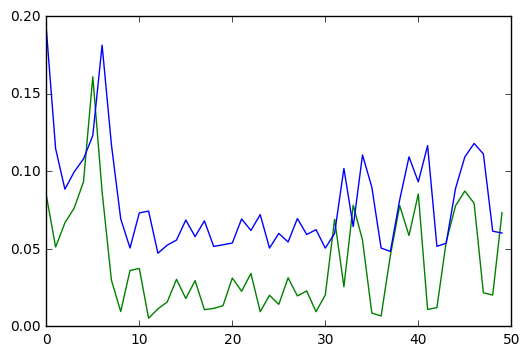

In [5]:
start = 3000
end = start+50
plt.plot(y_test[start:end], color='green')
plt.plot(linreg_preds[start:end], color = 'blue')
plt.show()

In [27]:
clf.coef_

array([ 0.87040609])